In [1]:
import os, json, cv2, random

In [2]:
import detectron2
import numpy as np
from matplotlib import pyplot as plt

from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [3]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, "/home/elice/seo/dataset/total_annotation/total_annotation.json", "/home/elice/seo/dataset/totalImg")
# register_coco_instances("my_dataset_test", {}, "/home/elice/seo/dataset/test_annotation/test_annotation.json", "/home/elice/seo/dataset/testImg")
print("done")

done


In [4]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
#you should add DEVICE options,when you don't have GPU
# cfg.MODEL.DEVICE = "cpu"
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 1
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2  # This is the real "batch size" commonly known to deep learning people
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 10000   # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # The "RoIHead batch size". 128 is faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 12  
cfg.OUTPUT_DIR="./RealOutputTest3"

print("done")
print(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
print(model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))

done
/home/elice/seo/detectron2/detectron2/model_zoo/configs/COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml
https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl


In [5]:
print(cfg.INPUT.FORMAT)

BGR


In [8]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[06/26 05:46:43 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

WARNING [06/26 05:46:43 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/26 05:46:43 d2.data.datasets.coco]: Loaded 2602 images in COCO format from /home/elice/seo/dataset/total_annotation/total_annotation.json
[06/26 05:46:43 d2.data.build]: Removed 0 images with no usable annotations. 2602 images left.
[06/26 05:46:44 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[06/26 05:46:44 d2.data.build]: Using training sampler TrainingSampler
[06/26 05:46:44 d2.data.common]: Serializing 2602 elements to byte tensors and concatenating them all ...
[06/26 05:46:44 d2.data.common]: Serialized dataset takes 0.69 MiB


Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (13, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (13,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (48, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (48,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias

[06/26 05:46:44 d2.engine.train_loop]: Starting training from iteration 0
[06/26 05:47:00 d2.utils.events]:  eta: 2:02:18  iter: 19  total_loss: 3.337  loss_cls: 2.653  loss_box_reg: 0.6364  loss_rpn_cls: 0.01531  loss_rpn_loc: 0.004111  time: 0.7562  data_time: 0.1242  lr: 4.9953e-06  max_mem: 4590M
[06/26 05:47:15 d2.utils.events]:  eta: 2:03:32  iter: 39  total_loss: 3.248  loss_cls: 2.493  loss_box_reg: 0.6449  loss_rpn_cls: 0.007452  loss_rpn_loc: 0.005083  time: 0.7667  data_time: 0.1029  lr: 9.9902e-06  max_mem: 4590M
[06/26 05:47:31 d2.utils.events]:  eta: 2:03:17  iter: 59  total_loss: 2.894  loss_cls: 2.217  loss_box_reg: 0.6262  loss_rpn_cls: 0.005739  loss_rpn_loc: 0.003862  time: 0.7644  data_time: 0.1230  lr: 1.4985e-05  max_mem: 4590M
[06/26 05:47:47 d2.utils.events]:  eta: 2:07:41  iter: 79  total_loss: 2.429  loss_cls: 1.745  loss_box_reg: 0.7437  loss_rpn_cls: 0.01299  loss_rpn_loc: 0.004216  time: 0.7805  data_time: 0.1809  lr: 1.998e-05  max_mem: 4590M
[06/26 05:48:

[06/26 05:55:40 d2.utils.events]:  eta: 1:52:15  iter: 699  total_loss: 0.5838  loss_cls: 0.2545  loss_box_reg: 0.3121  loss_rpn_cls: 0.0001186  loss_rpn_loc: 0.006631  time: 0.7642  data_time: 0.1509  lr: 0.00017483  max_mem: 4714M
[06/26 05:55:55 d2.utils.events]:  eta: 1:52:01  iter: 719  total_loss: 0.4635  loss_cls: 0.1803  loss_box_reg: 0.2819  loss_rpn_cls: 3.667e-06  loss_rpn_loc: 0.008397  time: 0.7640  data_time: 0.1111  lr: 0.00017982  max_mem: 4714M
[06/26 05:56:09 d2.utils.events]:  eta: 1:51:36  iter: 739  total_loss: 0.5312  loss_cls: 0.2251  loss_box_reg: 0.289  loss_rpn_cls: 9.434e-05  loss_rpn_loc: 0.006756  time: 0.7624  data_time: 0.0833  lr: 0.00018482  max_mem: 4714M
[06/26 05:56:25 d2.utils.events]:  eta: 1:51:21  iter: 759  total_loss: 0.6161  loss_cls: 0.2262  loss_box_reg: 0.3645  loss_rpn_cls: 0.0004249  loss_rpn_loc: 0.00623  time: 0.7636  data_time: 0.1804  lr: 0.00018981  max_mem: 4714M
[06/26 05:56:41 d2.utils.events]:  eta: 1:51:13  iter: 779  total_loss

[06/26 06:04:40 d2.utils.events]:  eta: 1:45:48  iter: 1399  total_loss: 0.3437  loss_cls: 0.1031  loss_box_reg: 0.2207  loss_rpn_cls: 7.512e-06  loss_rpn_loc: 0.004408  time: 0.7680  data_time: 0.1027  lr: 0.00025  max_mem: 4714M
[06/26 06:04:57 d2.utils.events]:  eta: 1:46:01  iter: 1419  total_loss: 0.3022  loss_cls: 0.09679  loss_box_reg: 0.1459  loss_rpn_cls: 3.152e-06  loss_rpn_loc: 0.002353  time: 0.7685  data_time: 0.1697  lr: 0.00025  max_mem: 4714M
[06/26 06:05:12 d2.utils.events]:  eta: 1:45:39  iter: 1439  total_loss: 0.3396  loss_cls: 0.1142  loss_box_reg: 0.1983  loss_rpn_cls: 2.675e-05  loss_rpn_loc: 0.003753  time: 0.7687  data_time: 0.1304  lr: 0.00025  max_mem: 4714M
[06/26 06:05:27 d2.utils.events]:  eta: 1:45:24  iter: 1459  total_loss: 0.2938  loss_cls: 0.1116  loss_box_reg: 0.1717  loss_rpn_cls: 2.195e-06  loss_rpn_loc: 0.003292  time: 0.7681  data_time: 0.0783  lr: 0.00025  max_mem: 4714M
[06/26 06:05:41 d2.utils.events]:  eta: 1:44:40  iter: 1479  total_loss: 0.

[06/26 06:13:35 d2.utils.events]:  eta: 1:35:21  iter: 2099  total_loss: 0.2894  loss_cls: 0.07539  loss_box_reg: 0.1647  loss_rpn_cls: 1.132e-05  loss_rpn_loc: 0.003829  time: 0.7665  data_time: 0.1508  lr: 0.00025  max_mem: 4714M
[06/26 06:13:50 d2.utils.events]:  eta: 1:35:06  iter: 2119  total_loss: 0.2958  loss_cls: 0.08062  loss_box_reg: 0.2054  loss_rpn_cls: 9.592e-06  loss_rpn_loc: 0.005189  time: 0.7663  data_time: 0.1337  lr: 0.00025  max_mem: 4714M
[06/26 06:14:06 d2.utils.events]:  eta: 1:34:58  iter: 2139  total_loss: 0.2805  loss_cls: 0.1054  loss_box_reg: 0.17  loss_rpn_cls: 1.434e-05  loss_rpn_loc: 0.003236  time: 0.7664  data_time: 0.1445  lr: 0.00025  max_mem: 4714M
[06/26 06:14:22 d2.utils.events]:  eta: 1:35:09  iter: 2159  total_loss: 0.2604  loss_cls: 0.1068  loss_box_reg: 0.1351  loss_rpn_cls: 7.859e-06  loss_rpn_loc: 0.003365  time: 0.7669  data_time: 0.1551  lr: 0.00025  max_mem: 4714M
[06/26 06:14:37 d2.utils.events]:  eta: 1:34:55  iter: 2179  total_loss: 0.2

[06/26 06:22:25 d2.utils.events]:  eta: 1:26:08  iter: 2799  total_loss: 0.2622  loss_cls: 0.09233  loss_box_reg: 0.1546  loss_rpn_cls: 1.822e-05  loss_rpn_loc: 0.00367  time: 0.7639  data_time: 0.1530  lr: 0.00025  max_mem: 4714M
[06/26 06:22:40 d2.utils.events]:  eta: 1:25:54  iter: 2819  total_loss: 0.2566  loss_cls: 0.07385  loss_box_reg: 0.1611  loss_rpn_cls: 1.716e-05  loss_rpn_loc: 0.0035  time: 0.7637  data_time: 0.1000  lr: 0.00025  max_mem: 4714M
[06/26 06:22:55 d2.utils.events]:  eta: 1:25:37  iter: 2839  total_loss: 0.295  loss_cls: 0.1257  loss_box_reg: 0.1423  loss_rpn_cls: 6.119e-05  loss_rpn_loc: 0.003562  time: 0.7637  data_time: 0.1520  lr: 0.00025  max_mem: 4714M
[06/26 06:23:09 d2.utils.events]:  eta: 1:25:22  iter: 2859  total_loss: 0.2053  loss_cls: 0.06843  loss_box_reg: 0.1392  loss_rpn_cls: 7.584e-06  loss_rpn_loc: 0.00314  time: 0.7634  data_time: 0.0778  lr: 0.00025  max_mem: 4714M
[06/26 06:23:25 d2.utils.events]:  eta: 1:25:15  iter: 2879  total_loss: 0.213

[06/26 06:31:23 d2.utils.events]:  eta: 1:18:57  iter: 3499  total_loss: 0.1921  loss_cls: 0.04994  loss_box_reg: 0.1286  loss_rpn_cls: 5.584e-06  loss_rpn_loc: 0.003139  time: 0.7649  data_time: 0.1132  lr: 0.00025  max_mem: 4714M
[06/26 06:31:39 d2.utils.events]:  eta: 1:18:43  iter: 3519  total_loss: 0.2119  loss_cls: 0.07272  loss_box_reg: 0.1281  loss_rpn_cls: 3.685e-05  loss_rpn_loc: 0.003716  time: 0.7650  data_time: 0.1121  lr: 0.00025  max_mem: 4714M
[06/26 06:31:55 d2.utils.events]:  eta: 1:18:34  iter: 3539  total_loss: 0.2172  loss_cls: 0.05741  loss_box_reg: 0.1534  loss_rpn_cls: 7.466e-06  loss_rpn_loc: 0.003413  time: 0.7652  data_time: 0.1676  lr: 0.00025  max_mem: 4714M
[06/26 06:32:10 d2.utils.events]:  eta: 1:18:17  iter: 3559  total_loss: 0.2103  loss_cls: 0.07048  loss_box_reg: 0.1254  loss_rpn_cls: 1.229e-05  loss_rpn_loc: 0.002352  time: 0.7651  data_time: 0.0852  lr: 0.00025  max_mem: 4714M
[06/26 06:32:24 d2.utils.events]:  eta: 1:18:05  iter: 3579  total_loss:

[06/26 06:40:22 d2.utils.events]:  eta: 1:10:02  iter: 4199  total_loss: 0.2726  loss_cls: 0.09274  loss_box_reg: 0.1693  loss_rpn_cls: 4.33e-05  loss_rpn_loc: 0.004154  time: 0.7657  data_time: 0.1469  lr: 0.00025  max_mem: 4714M
[06/26 06:40:37 d2.utils.events]:  eta: 1:09:40  iter: 4219  total_loss: 0.2369  loss_cls: 0.07885  loss_box_reg: 0.133  loss_rpn_cls: 2.294e-05  loss_rpn_loc: 0.005083  time: 0.7655  data_time: 0.1010  lr: 0.00025  max_mem: 4714M
[06/26 06:40:53 d2.utils.events]:  eta: 1:09:27  iter: 4239  total_loss: 0.2396  loss_cls: 0.07367  loss_box_reg: 0.1486  loss_rpn_cls: 9.098e-06  loss_rpn_loc: 0.003579  time: 0.7656  data_time: 0.1308  lr: 0.00025  max_mem: 4714M
[06/26 06:41:08 d2.utils.events]:  eta: 1:09:18  iter: 4259  total_loss: 0.1999  loss_cls: 0.06984  loss_box_reg: 0.123  loss_rpn_cls: 1.052e-05  loss_rpn_loc: 0.002359  time: 0.7655  data_time: 0.0969  lr: 0.00025  max_mem: 4714M
[06/26 06:41:22 d2.utils.events]:  eta: 1:08:56  iter: 4279  total_loss: 0.

[06/26 06:49:08 d2.utils.events]:  eta: 1:00:37  iter: 4899  total_loss: 0.2046  loss_cls: 0.06692  loss_box_reg: 0.1337  loss_rpn_cls: 6.002e-05  loss_rpn_loc: 0.003071  time: 0.7634  data_time: 0.1105  lr: 0.00025  max_mem: 4714M
[06/26 06:49:23 d2.utils.events]:  eta: 1:00:26  iter: 4919  total_loss: 0.213  loss_cls: 0.07431  loss_box_reg: 0.1225  loss_rpn_cls: 9.501e-06  loss_rpn_loc: 0.002607  time: 0.7634  data_time: 0.1086  lr: 0.00025  max_mem: 4714M
[06/26 06:49:38 d2.utils.events]:  eta: 1:00:06  iter: 4939  total_loss: 0.2033  loss_cls: 0.0501  loss_box_reg: 0.1271  loss_rpn_cls: 4.684e-06  loss_rpn_loc: 0.004004  time: 0.7634  data_time: 0.1213  lr: 0.00025  max_mem: 4714M
[06/26 06:49:52 d2.utils.events]:  eta: 0:59:55  iter: 4959  total_loss: 0.2505  loss_cls: 0.07627  loss_box_reg: 0.1404  loss_rpn_cls: 1.079e-05  loss_rpn_loc: 0.003043  time: 0.7632  data_time: 0.0908  lr: 0.00025  max_mem: 4714M
[06/26 06:50:07 d2.utils.events]:  eta: 0:59:38  iter: 4979  total_loss: 0

[06/26 06:57:56 d2.utils.events]:  eta: 0:52:23  iter: 5599  total_loss: 0.1988  loss_cls: 0.06445  loss_box_reg: 0.1226  loss_rpn_cls: 1.501e-05  loss_rpn_loc: 0.002995  time: 0.7622  data_time: 0.1381  lr: 0.00025  max_mem: 4714M
[06/26 06:58:12 d2.utils.events]:  eta: 0:52:09  iter: 5619  total_loss: 0.1627  loss_cls: 0.07865  loss_box_reg: 0.09362  loss_rpn_cls: 1.915e-05  loss_rpn_loc: 0.002089  time: 0.7623  data_time: 0.1603  lr: 0.00025  max_mem: 4714M
[06/26 06:58:28 d2.utils.events]:  eta: 0:51:56  iter: 5639  total_loss: 0.1918  loss_cls: 0.07029  loss_box_reg: 0.1315  loss_rpn_cls: 7.259e-06  loss_rpn_loc: 0.003025  time: 0.7624  data_time: 0.1684  lr: 0.00025  max_mem: 4714M
[06/26 06:58:44 d2.utils.events]:  eta: 0:51:42  iter: 5659  total_loss: 0.1858  loss_cls: 0.04071  loss_box_reg: 0.117  loss_rpn_cls: 1.466e-05  loss_rpn_loc: 0.00308  time: 0.7625  data_time: 0.1325  lr: 0.00025  max_mem: 4714M
[06/26 06:58:59 d2.utils.events]:  eta: 0:51:29  iter: 5679  total_loss: 

[06/26 07:06:51 d2.utils.events]:  eta: 0:44:07  iter: 6299  total_loss: 0.1811  loss_cls: 0.04633  loss_box_reg: 0.1179  loss_rpn_cls: 1.332e-05  loss_rpn_loc: 0.002674  time: 0.7623  data_time: 0.1061  lr: 0.00025  max_mem: 4714M
[06/26 07:07:05 d2.utils.events]:  eta: 0:43:49  iter: 6319  total_loss: 0.1845  loss_cls: 0.04164  loss_box_reg: 0.1183  loss_rpn_cls: 9.715e-06  loss_rpn_loc: 0.002461  time: 0.7621  data_time: 0.1026  lr: 0.00025  max_mem: 4714M
[06/26 07:07:21 d2.utils.events]:  eta: 0:43:34  iter: 6339  total_loss: 0.1855  loss_cls: 0.07588  loss_box_reg: 0.109  loss_rpn_cls: 5.133e-06  loss_rpn_loc: 0.002841  time: 0.7622  data_time: 0.1437  lr: 0.00025  max_mem: 4714M
[06/26 07:07:37 d2.utils.events]:  eta: 0:43:20  iter: 6359  total_loss: 0.1928  loss_cls: 0.05931  loss_box_reg: 0.1096  loss_rpn_cls: 5.979e-06  loss_rpn_loc: 0.003548  time: 0.7623  data_time: 0.1581  lr: 0.00025  max_mem: 4714M
[06/26 07:07:51 d2.utils.events]:  eta: 0:43:05  iter: 6379  total_loss: 

[06/26 07:15:41 d2.utils.events]:  eta: 0:35:54  iter: 6999  total_loss: 0.1573  loss_cls: 0.04685  loss_box_reg: 0.09978  loss_rpn_cls: 2.122e-05  loss_rpn_loc: 0.002008  time: 0.7617  data_time: 0.0929  lr: 0.00025  max_mem: 4714M
[06/26 07:15:54 d2.utils.events]:  eta: 0:35:38  iter: 7019  total_loss: 0.2121  loss_cls: 0.06496  loss_box_reg: 0.1316  loss_rpn_cls: 2.343e-05  loss_rpn_loc: 0.002846  time: 0.7615  data_time: 0.0972  lr: 0.00025  max_mem: 4714M
[06/26 07:16:09 d2.utils.events]:  eta: 0:35:20  iter: 7039  total_loss: 0.2003  loss_cls: 0.06684  loss_box_reg: 0.1277  loss_rpn_cls: 1.895e-05  loss_rpn_loc: 0.002482  time: 0.7615  data_time: 0.1029  lr: 0.00025  max_mem: 4714M
[06/26 07:16:25 d2.utils.events]:  eta: 0:35:13  iter: 7059  total_loss: 0.1887  loss_cls: 0.05155  loss_box_reg: 0.0994  loss_rpn_cls: 1.028e-05  loss_rpn_loc: 0.002965  time: 0.7615  data_time: 0.1420  lr: 0.00025  max_mem: 4714M
[06/26 07:16:40 d2.utils.events]:  eta: 0:34:58  iter: 7079  total_loss

[06/26 07:24:30 d2.utils.events]:  eta: 0:27:22  iter: 7699  total_loss: 0.1689  loss_cls: 0.04714  loss_box_reg: 0.112  loss_rpn_cls: 7.511e-06  loss_rpn_loc: 0.003555  time: 0.7612  data_time: 0.0909  lr: 0.00025  max_mem: 4714M
[06/26 07:24:47 d2.utils.events]:  eta: 0:27:10  iter: 7719  total_loss: 0.1817  loss_cls: 0.04861  loss_box_reg: 0.1256  loss_rpn_cls: 1.09e-05  loss_rpn_loc: 0.002717  time: 0.7614  data_time: 0.1986  lr: 0.00025  max_mem: 4714M
[06/26 07:25:02 d2.utils.events]:  eta: 0:26:59  iter: 7739  total_loss: 0.1688  loss_cls: 0.06343  loss_box_reg: 0.08926  loss_rpn_cls: 1.854e-05  loss_rpn_loc: 0.003055  time: 0.7613  data_time: 0.1237  lr: 0.00025  max_mem: 4714M
[06/26 07:25:17 d2.utils.events]:  eta: 0:26:42  iter: 7759  total_loss: 0.1984  loss_cls: 0.07098  loss_box_reg: 0.1032  loss_rpn_cls: 1.376e-05  loss_rpn_loc: 0.002007  time: 0.7613  data_time: 0.1279  lr: 0.00025  max_mem: 4714M
[06/26 07:25:33 d2.utils.events]:  eta: 0:26:27  iter: 7779  total_loss: 

[06/26 07:33:29 d2.utils.events]:  eta: 0:19:12  iter: 8399  total_loss: 0.1617  loss_cls: 0.04805  loss_box_reg: 0.1043  loss_rpn_cls: 1.293e-05  loss_rpn_loc: 0.002525  time: 0.7619  data_time: 0.1178  lr: 0.00025  max_mem: 4714M
[06/26 07:33:45 d2.utils.events]:  eta: 0:18:58  iter: 8419  total_loss: 0.1785  loss_cls: 0.04194  loss_box_reg: 0.1193  loss_rpn_cls: 1.332e-05  loss_rpn_loc: 0.002714  time: 0.7619  data_time: 0.1389  lr: 0.00025  max_mem: 4714M
[06/26 07:34:00 d2.utils.events]:  eta: 0:18:46  iter: 8439  total_loss: 0.1689  loss_cls: 0.05485  loss_box_reg: 0.1119  loss_rpn_cls: 1.074e-05  loss_rpn_loc: 0.002815  time: 0.7619  data_time: 0.1429  lr: 0.00025  max_mem: 4714M
[06/26 07:34:16 d2.utils.events]:  eta: 0:18:31  iter: 8459  total_loss: 0.1745  loss_cls: 0.04094  loss_box_reg: 0.1113  loss_rpn_cls: 9.969e-06  loss_rpn_loc: 0.003678  time: 0.7620  data_time: 0.1251  lr: 0.00025  max_mem: 4714M
[06/26 07:34:31 d2.utils.events]:  eta: 0:18:17  iter: 8479  total_loss:

[06/26 07:42:08 d2.utils.events]:  eta: 0:11:01  iter: 9079  total_loss: 0.1966  loss_cls: 0.06013  loss_box_reg: 0.121  loss_rpn_cls: 2.85e-05  loss_rpn_loc: 0.00312  time: 0.7619  data_time: 0.1601  lr: 0.00025  max_mem: 4714M
[06/26 07:42:22 d2.utils.events]:  eta: 0:10:46  iter: 9099  total_loss: 0.1779  loss_cls: 0.03663  loss_box_reg: 0.134  loss_rpn_cls: 7.397e-06  loss_rpn_loc: 0.002152  time: 0.7618  data_time: 0.0687  lr: 0.00025  max_mem: 4714M
[06/26 07:42:38 d2.utils.events]:  eta: 0:10:33  iter: 9119  total_loss: 0.1511  loss_cls: 0.05147  loss_box_reg: 0.1031  loss_rpn_cls: 7.201e-06  loss_rpn_loc: 0.002323  time: 0.7619  data_time: 0.1124  lr: 0.00025  max_mem: 4714M
[06/26 07:42:53 d2.utils.events]:  eta: 0:10:19  iter: 9139  total_loss: 0.1787  loss_cls: 0.05221  loss_box_reg: 0.1265  loss_rpn_cls: 3.204e-05  loss_rpn_loc: 0.003211  time: 0.7619  data_time: 0.1415  lr: 0.00025  max_mem: 4714M
[06/26 07:43:09 d2.utils.events]:  eta: 0:10:04  iter: 9159  total_loss: 0.1

[06/26 07:51:09 d2.utils.events]:  eta: 0:02:40  iter: 9779  total_loss: 0.1625  loss_cls: 0.03416  loss_box_reg: 0.1136  loss_rpn_cls: 1.93e-05  loss_rpn_loc: 0.002739  time: 0.7626  data_time: 0.1293  lr: 0.00025  max_mem: 4714M
[06/26 07:51:23 d2.utils.events]:  eta: 0:02:25  iter: 9799  total_loss: 0.1626  loss_cls: 0.04562  loss_box_reg: 0.09494  loss_rpn_cls: 7.237e-06  loss_rpn_loc: 0.001727  time: 0.7626  data_time: 0.1136  lr: 0.00025  max_mem: 4714M
[06/26 07:51:39 d2.utils.events]:  eta: 0:02:11  iter: 9819  total_loss: 0.1661  loss_cls: 0.05597  loss_box_reg: 0.09381  loss_rpn_cls: 1.048e-05  loss_rpn_loc: 0.003051  time: 0.7626  data_time: 0.1302  lr: 0.00025  max_mem: 4714M
[06/26 07:51:55 d2.utils.events]:  eta: 0:01:56  iter: 9839  total_loss: 0.1725  loss_cls: 0.06504  loss_box_reg: 0.09562  loss_rpn_cls: 1.162e-05  loss_rpn_loc: 0.002076  time: 0.7627  data_time: 0.1580  lr: 0.00025  max_mem: 4714M
[06/26 07:52:10 d2.utils.events]:  eta: 0:01:41  iter: 9859  total_los

In [7]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

[06/26 05:27:08 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,1,1)             |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,3,3)             |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

/home/elice/seo/Dy/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


True

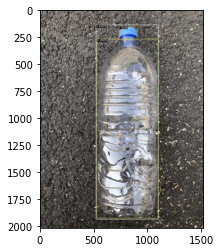

In [12]:
from detectron2.utils.visualizer import ColorMode
im=cv2.imread("/home/elice/seo/dataset/testImg/50141.jpg")
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
                   metadata=MetadataCatalog.get("my_dataset_test"), 
                   scale=0.5, 
                   instance_mode=ColorMode.SEGMENTATION   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
resultImg=out.get_image()[:, :, ::-1]
plt.imshow(cv2.cvtColor(resultImg,cv2.COLOR_BGR2RGB))
cv2.imwrite("/home/elice/seo/custom/outputImages/masked00064.jpg",resultImg)

True

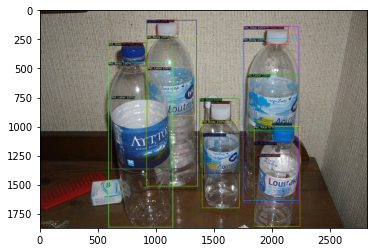

In [81]:
im=cv2.imread("/home/elice/seo/dataset/trainImg/00000.JPG")
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
                   metadata=MetadataCatalog.get("my_dataset_test"), 
                   scale=1, 
                   instance_mode=ColorMode.SEGMENTATION   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
resultImg=out.get_image()[:, :, ::-1]
plt.imshow(cv2.cvtColor(resultImg,cv2.COLOR_BGR2RGB))
cv2.imwrite("/home/elice/seo/custom/outputImages/masked00000.jpg",resultImg)

In [82]:
print(resultImg.shape)

(1872, 2816, 3)


In [83]:
print(cfg.INPUT.FORMAT)

BGR


In [92]:
print(outputs["instances"])

Instances(num_instances=3, image_height=4032, image_width=3024, fields=[pred_boxes: Boxes(tensor([[1045.2476,  536.8858, 2178.2690, 3848.9243],
        [1031.4386,  274.2899, 2179.0569, 3869.9387],
        [1453.2740,  312.7558, 1792.3757,  553.8503]], device='cuda:0')), scores: tensor([0.9996, 0.9983, 0.9975], device='cuda:0'), pred_classes: tensor([0, 3, 1], device='cuda:0')])


In [5]:
print(MetadataCatalog.get("my_dataset_train"))

Metadata(evaluator_type='coco', image_root='/home/elice/seo/dataset/trainImg', json_file='/home/elice/seo/dataset/train_annotation/train_annotation.json', name='my_dataset_train')


In [8]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator("my_dataset_test", cfg, False, output_dir="./RealOutputEvaluate2/")
val_loader = build_detection_test_loader(cfg, "my_dataset_test")
print(inference_on_dataset(trainer.model, val_loader, evaluator))

[06/26 05:27:17 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [06/26 05:27:17 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [06/26 05:27:17 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/26 05:27:17 d2.data.datasets.coco]: Loaded 519 images in COCO format from /home/elice/seo/dataset/test_annotation/test_annotation.json
[06/26 05:27:17 d2.data.build]: Distribution of instances among all 12 categories:
|   category   | #instances   |   category    | #instances   |  category   | #instances   |
|:------------:|:-------------|:-------------:|:-------------|:-----------:|:-------------|
|  Can_Total   | 64           |  Carton_Body  | 101          | Carton_Head | 21           |
| Carton_Straw | 10           | Carton_Total  | 101          | Paper_Total | 48  

[06/26 05:30:23 d2.evaluation.evaluator]: Total inference time: 0:03:02.321694 (0.354711 s / iter per device, on 1 devices)
[06/26 05:30:23 d2.evaluation.evaluator]: Total inference pure compute time: 0:01:15 (0.146094 s / iter per device, on 1 devices)
[06/26 05:30:23 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[06/26 05:30:23 d2.evaluation.coco_evaluation]: Saving results to ./RealOutputEvaluate2/coco_instances_results.json
[06/26 05:30:23 d2.evaluation.coco_evaluation]: Evaluating predictions with official COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.52s).
Accumulating evaluation results...
DONE (t=0.13s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.839
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.954
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0

In [15]:
evaluator = COCOEvaluator("my_dataset_train", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "my_dataset_train")
print(inference_on_dataset(trainer.model, val_loader, evaluator))

[06/17 22:44:58 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [06/17 22:44:58 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [06/17 22:44:58 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/17 22:44:58 d2.data.datasets.coco]: Loaded 293 images in COCO format from /home/elice/seo/dataset/train_annotation/train_annotation.json
[06/17 22:44:58 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[06/17 22:44:58 d2.data.common]: Serializing 293 elements to byte tensors and concatenating them all ...
[06/17 22:44:58 d2.data.common]: Serialized dataset takes 0.09 MiB
[06/17 22:44:58 d2.evaluation.evaluator]: Start inference on 293 batches
[06/17 22:45:0

[06/17 22:47:31 d2.evaluation.coco_evaluation]: Some metrics cannot be computed and is shown as NaN.
[06/17 22:47:31 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category   | AP     | category   | AP     | category   | AP     |
|:-----------|:-------|:-----------|:-------|:-----------|:-------|
| Pet_Body   | 97.942 | Pet_Head   | 95.417 | Pet_Label  | 92.988 |
| Pet_Total  | 97.292 |            |        |            |        |
OrderedDict([('bbox', {'AP': 95.90985965026488, 'AP50': 99.74004924678232, 'AP75': 99.48127510176519, 'APs': nan, 'APm': nan, 'APl': 95.90985965026488, 'AP-Pet_Body': 97.94182681191765, 'AP-Pet_Head': 95.41747957496074, 'AP-Pet_Label': 92.98766634303506, 'AP-Pet_Total': 97.29246587114606})])


True

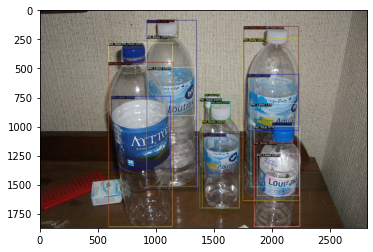

In [74]:
im=cv2.imread("/home/elice/seo/dataset/trainImg/00000.JPG")
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
                   metadata=MetadataCatalog.get("my_dataset_train"), 
                   scale=1, 
                   instance_mode=ColorMode.SEGMENTATION   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
resultImg=out.get_image()[:, :, ::-1]
plt.imshow(cv2.cvtColor(resultImg,cv2.COLOR_BGR2RGB))
cv2.imwrite("/home/elice/seo/custom/outputImages/masked00000.jpg",resultImg)

In [75]:
print(resultImg.shape)

(1872, 2816, 3)


In [76]:
print(cfg.INPUT.FORMAT)

BGR


In [22]:
import torch
from torchvision import transforms
model=torch.load("/home/elice/seo/custom/output/model_final.pth")
img=cv2.imread("/home/elice/seo/dataset/trainImg/00000.JPG")
transform=transforms.ToTensor()
input=transform(img)
input=input.unsqueeze(0)
result=model(img)
print(result)
plt.imshow(img)
# pred = model(img)
# pred_np = pred.cpu().detach().numpy()
# print(pred_np)

TypeError: 'dict' object is not callable

In [ ]:
modelPath="/home/elice/seo/aiServer/resource/model/model_final.pth"
testModel=torch.load(modelPath)